In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplleaflet
import pandas as pd
import numpy as np
import re

In [2]:
DF=pd.read_csv('data/C2A2_data/BinnedCsvs_d400/7d59fca27d7a90aff23db8743a1ec51ad84debf2ce61d4182291170b.csv')
DF.head()

,ID,Date,Element,Data_Value
0,PEM00084628,2007-01-31,TMIN,205
1,PEM00084628,2008-08-16,TMAX,198
2,PEM00084628,2012-10-26,TMIN,157
3,PEM00084628,2015-08-29,TMAX,232
4,PEM00084628,2007-01-04,TMIN,216


In [3]:
DF['Data_Value']=DF['Data_Value']/10

DF['Date']=pd.to_datetime(DF['Date'])
DF['Year']=DF['Date'].dt.year
DF['Day']=DF['Date'].dt.day
DF['Month']=DF['Date'].dt.month
DF['Month-Day']=DF['Month'].astype(str)+'-'+DF['Day'].astype(str)
#DF.head()
df_temp=DF[(DF['Year']==2007)&(DF['Element']=='TMAX')]
df_temp=df_temp.set_index('Month-Day')
df_temp.head()

,ID,Date,Element,Data_Value,Year,Day,Month
Month-Day,,,,,,,
1-13,PEM00084628,2007-01-13,TMAX,26.6,2007,13,1
1-11,PEM00084628,2007-01-11,TMAX,27.7,2007,11,1
1-4,PEM00084628,2007-01-04,TMAX,26.9,2007,4,1
6-12,PEM00084628,2007-06-12,TMAX,17.4,2007,12,6
5-5,PEM00084628,2007-05-05,TMAX,23.8,2007,5,5


In [4]:
#Data set de fechas
x_dates=np.arange('2007-01-01','2008-01-01',dtype='datetime64[D]')
x_dates=list(map(pd.to_datetime,x_dates))

df_dates=pd.DataFrame()
df_dates['Date']=x_dates
df_dates['Day']=df_dates['Date'].dt.day
df_dates['Month']=df_dates['Date'].dt.month
df_dates['Month-Day']=df_dates['Month'].astype(str)+'-'+df_dates['Day'].astype(str)
df_dates=df_dates.set_index('Month-Day')
df_dates.head()

,Date,Day,Month
Month-Day,,,
1-1,2007-01-01,1,1
1-2,2007-01-02,2,1
1-3,2007-01-03,3,1
1-4,2007-01-04,4,1
1-5,2007-01-05,5,1


In [5]:
#Combinando datasets
DF1=df_dates.merge(df_temp,how='left',left_index=True, right_index=True)
DF1.fillna(0,inplace=True)
DF1.head()

,Date_x,Day_x,Month_x,ID,Date_y,Element,Data_Value,Year,Day_y,Month_y
Month-Day,,,,,,,,,,
1-1,2007-01-01,1,1,PEM00084628,2007-01-01,TMAX,26.5,2007.0,1.0,1.0
1-2,2007-01-02,2,1,PEM00084628,2007-01-02,TMAX,26.8,2007.0,2.0,1.0
1-3,2007-01-03,3,1,0,1970-01-01,0,0.0,0.0,0.0,0.0
1-4,2007-01-04,4,1,PEM00084628,2007-01-04,TMAX,26.9,2007.0,4.0,1.0
1-5,2007-01-05,5,1,0,1970-01-01,0,0.0,0.0,0.0,0.0


In [6]:
DF1['Data_Value']=pd.to_numeric(DF1['Data_Value'])
ytemp=DF1['Data_Value']
ytemp=list(map(pd.to_numeric,ytemp))

<IPython.core.display.Javascript object>


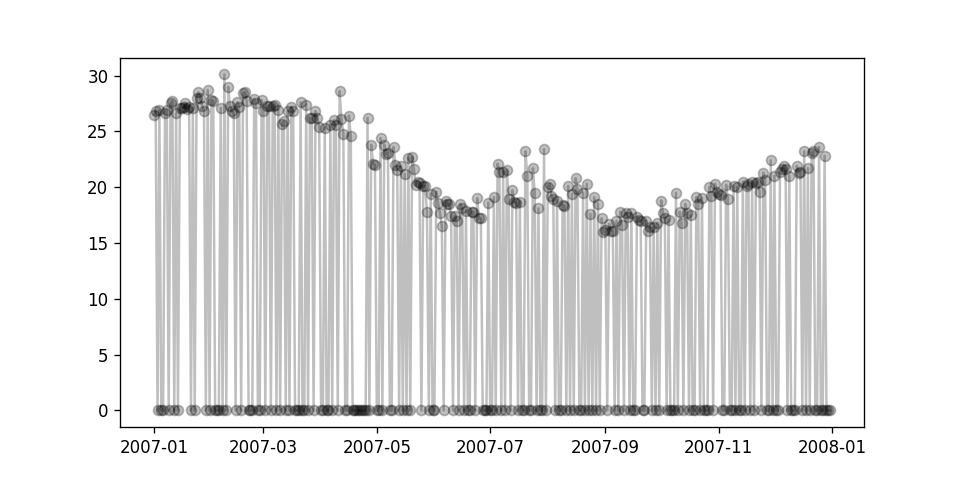

In [7]:
plt.figure(figsize=(8,4))
plt.plot(x_dates,ytemp,'-o',c='black',alpha=0.25,label='Temperature 2005-2014')

In [8]:
df_terr=pd.read_excel('Catalogo1960_2021.xlsx')
df_terr.head()

,ID,FECHA_UTC,HORA_UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD,FECHA_CORTE
0,0,1960-01-13,15:40:34,-16.145,-72.144,60,7.5,20223006
1,1,1960-01-15,09:30:24,-15.000,-75.000,70,7.0,20223006
2,2,1960-01-17,02:57:58,-14.500,-74.500,150,6.4,20223006
3,3,1960-01-23,03:37:32,-12.500,-68.500,300,5.8,20223006
4,4,1960-01-30,05:07:24,-5.500,-77.500,100,5.7,20223006


In [9]:
df_terr['FECHA_UTC']=pd.to_datetime(df_terr['FECHA_UTC'])
df_terr['LATITUD']=pd.to_numeric(df_terr['LATITUD'])
df_terr['LONGITUD']=pd.to_numeric(df_terr['LONGITUD'])

df_terr['Year']=df_terr['FECHA_UTC'].dt.year
df_terr['Day']=df_terr['FECHA_UTC'].dt.day
df_terr['Month']=df_terr['FECHA_UTC'].dt.month
df_terr['Month-Day']=df_terr['Month'].astype(str)+'-'+df_terr['Day'].astype(str)

df_terr=df_terr[(df_terr['Year']==2007)&(df_terr['LATITUD']>=-14)&(df_terr['LATITUD']<=-10)&(df_terr['LONGITUD']<=-75)&(df_terr['LONGITUD']>=-79)]
#df_terr=df_terr.set_index('Month-Day')
df_terr.head()

,ID,FECHA_UTC,HORA_UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD,FECHA_CORTE,Year,Day,Month,Month-Day
11999,11999,2007-02-17,21:35:54,-13.7697,-76.3624,52,4.9,20223006,2007,17,2,2-17
12000,12000,2007-02-18,15:48:26,-13.7193,-76.3367,47,4.5,20223006,2007,18,2,2-18
12023,12023,2007-03-09,13:53:28,-13.8375,-75.9488,90,4.9,20223006,2007,9,3,3-9
12028,12028,2007-03-15,00:20:36,-11.3913,-76.0026,19,4.5,20223006,2007,15,3,3-15
12041,12041,2007-04-02,04:46:48,-11.5662,-76.7795,126,4.5,20223006,2007,2,4,4-2


In [10]:
df_terr2=df_terr.groupby("Month-Day").agg({"MAGNITUD":(np.max)})
df_terr2.head()

,MAGNITUD
Month-Day,
10-1,5.0
10-21,4.6
10-24,5.4
10-5,5.4
10-6,4.8


In [11]:
#Combinando dataset DF1 con las Magnitudes de terremotos del año 2007
DF2=DF1.merge(df_terr2,how='left',left_index=True, right_index=True)
DF2=DF2.dropna()
DF2.head()

,Date_x,Day_x,Month_x,ID,Date_y,Element,Data_Value,Year,Day_y,Month_y,MAGNITUD
Month-Day,,,,,,,,,,,
2-17,2007-02-17,17,2,0,1970-01-01,0,0.0,0.0,0.0,0.0,4.9
2-18,2007-02-18,18,2,PEM00084628,2007-02-18,TMAX,28.4,2007.0,18.0,2.0,4.5
3-9,2007-03-09,9,3,PEM00084628,2007-03-09,TMAX,26.9,2007.0,9.0,3.0,4.9
3-15,2007-03-15,15,3,0,1970-01-01,0,0.0,0.0,0.0,0.0,4.5
4-2,2007-04-02,2,4,0,1970-01-01,0,0.0,0.0,0.0,0.0,4.5


In [12]:
x=pd.to_datetime(DF2['Date_x'])

ytemp=DF2['Data_Value']
ytemp=list(map(pd.to_numeric,ytemp))

base=[0]*len(x)

yterr=DF2['MAGNITUD']
yterr=list(map(pd.to_numeric,yterr))
len(x)

62

<IPython.core.display.Javascript object>


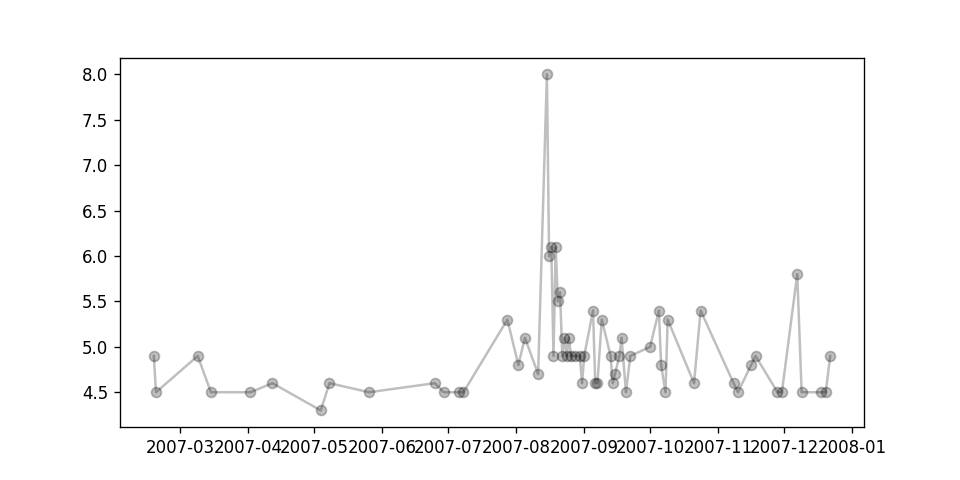

In [13]:
plt.figure(figsize=(8,4))
plt.plot(x,yterr,'-o',c='black',alpha=0.25,label='Temperature 2005-2014')

<IPython.core.display.Javascript object>


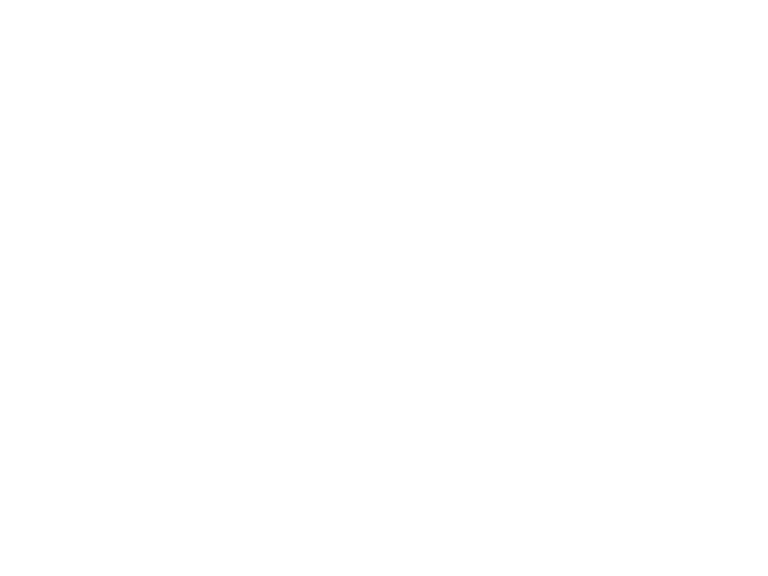

In [14]:
#Dibujando los dos juntos
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()    # mirror the ax1
ax1.plot(x, ytemp,'r-')
ax2.plot(x, yterr, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Temperature', color='g')
ax2.set_ylabel('Earthquake Magnitude', color='b')

plt.rcParams["figure.figsize"] = (8, 4)

plt.show()

In [15]:
#Pintando el área
plt.gca().fill_between(range(len(x)),base,ytemp,facecolor='blue',alpha=0.25)

<IPython.core.display.Javascript object>


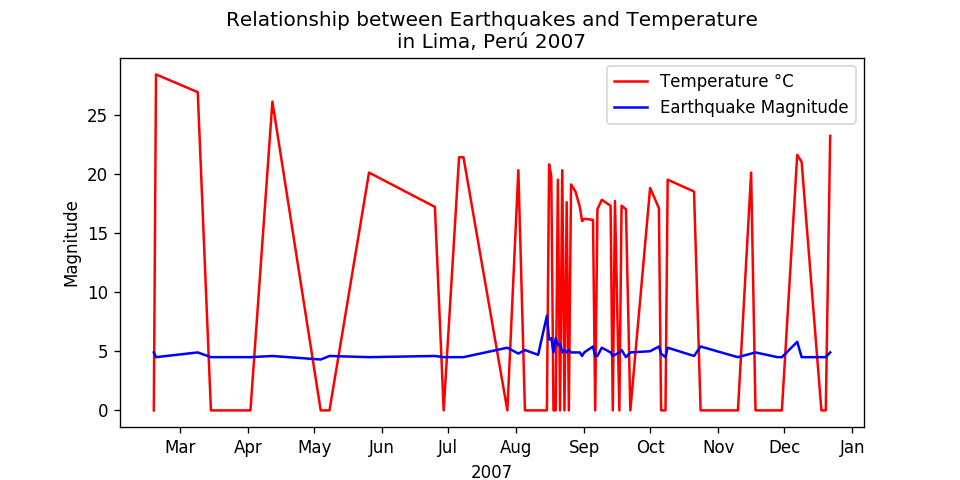

In [16]:
#Dibujando los dos juntos - 1 solo Eje
plt.figure(figsize=(8,4))

plt.plot(x, ytemp,'r-',label='Temperature °C')
plt.plot(x, yterr, 'b-',label='Earthquake Magnitude')

plt.xlabel('2007')
plt.ylabel('Magnitude')
plt.title('Relationship between Earthquakes and Temperature\nin Lima, Perú 2007')

#Límites de fechas Eje X
myFmt = mdates.DateFormatter('%b')
months = mdates.MonthLocator()

ax=plt.gca()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(myFmt)
#ax.xaxis.set_minor_locator(days)

plt.legend(loc=1)

plt.show()

In [17]:
#plt.gca().fill_between(range(len(x)),ytemp,yterr,facecolor='blue',alpha=0.25)